In [2]:
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

## NLP Analysis
### Debate Presidencial 2023, Segunda Vuelta


El siguiente análisis se ha realizado sobre el texto del Debate Presidencial de 2023, Segunda Ronda, para la Presidencia de Ecuador. Su objetivo es resaltar aspectos de interés relacionados con la participación de ambos candidatos.

By. Vanessa Salazar P. MsC.

#### Construccion de DataFrame y limpieza de texto

In [3]:
datetime_list = []
participant_list = []
text_list = []

with open('texto_debate.txt', encoding="utf8") as db_text:
    lines = db_text.readlines()

i = 0
while i < len(lines):

    datetime = lines[i][:8]
    participant = lines[i][9:].rstrip()
    i += 1
    text = lines[i].strip()
    i += 2

    datetime_list.append(datetime)
    participant_list.append(participant)
    text_list.append(text)

data = {'hora': datetime_list, 'participante': participant_list, 'texto': text_list}
df = pd.DataFrame(data)

In [16]:
candidatos = ['Daniel Noboa', 'Luisa Gonzalez']
ejes_tematicos = ['Económico', 'Seguridad', 'Social', 'Político']

for i in range(len(df)):
    if df.loc[i, "participante"] in candidatos:
        if df.loc[i, "hora"] < '00:34:26':
            df.loc[i, "eje_tematico"] = ejes_tematicos[0]
        elif df.loc[i, "hora"]  > '00:34:26' and df['hora'][i] < '01:03:18' :
            df.loc[i, "eje_tematico"] = ejes_tematicos[1]
        elif df.loc[i, "hora"]  > '01:03:18' and df['hora'][i] < '01:27:44' :
            df.loc[i, "eje_tematico"] = ejes_tematicos[2]
        elif df.loc[i, "hora"]  > '01:27:44' and df['hora'][i] < '01:54:40' :
            df.loc[i, "eje_tematico"] = ejes_tematicos[3]
        else: 
            df.loc[i, "eje_tematico"] = 'despedida'

In [59]:
df['texto_limpio'] = df['texto'].apply(str. lower)
#remove stop words
#stop = stopwords.words('spanish')
stop = ['de','la', 'cada','ser', 'que', '100', 'ahi', 'el',  'tener', 'dia ', 'en', 'y', 'mismo', 'a', 'los', 'del', 'asi', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'sin', 'sobre', 'también', '1', 'me', 'hay', 'donde', 'quien', 'desde', 'nos', 'durante', 'uno', 'les', 'ni', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'quienes', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas''vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'esté', 'estés', 'estemos', 'estéis', 'estén', 'estaré', 'estarás', 'estará', 'estaréis', 'estarán', 'estaría', 'estarías', 'estaríamos', 'estaríais', 'estarían', 'estaba', 'estabas', 'estábamos', 'estabais', 'estaban', 'estuve', 'estuviste', 'estuvo', 'estuvisteis', 'estuvieron', 'estuviera', 'estuvieras', 'estuviéramos', 'estuvierais', 'estuvieran', 'estuviese', 'estuvieses', 'estuviésemos', 'estuvieseis', 'estuviesen', 'estando', 'estada', 'estadas', 'estad', 'he', 'has', 'ha',  'habéis', 'han', 'haya', 'hayas', 'hayamos', 'hayáis', 'hayan', 'habré', 'habrás', 'habrá', 'habréis', 'habrán', 'habría', 'habrías', 'habríamos', 'habríais', 'habrían', 'había', 'habías', 'habíamos', 'habíais', 'habían', 'hube', 'hubiste', 'hubo', 'hubimos', 'hubisteis', 'hubieron', 'hubiera', 'hubieras', 'hubiéramos', 'hubierais', 'hubieran', 'hubiese', 'hubieses', 'hubiésemos', 'hubieseis', 'hubiesen', 'habiendo', 'habido', 'habida', 'habidos', 'habidas', 'soy', 'eres', 'es', 'sois', 'son', 'sea', 'seas', 'seamos', 'seáis', 'sean', 'seré', 'serás', 'será', 'seréis', 'serán', 'sería', 'serías', 'seríamos', 'seríais', 'serían', 'era', 'eras', 'éramos', 'erais', 'eran', 'fui', 'fuiste', 'fue', 'fuimos', 'fuisteis', 'fueron', 'fuera', 'fueras', 'fuéramos', 'fuerais', 'fueran', 'fuese', 'fueses', 'fuésemos', 'fueseis', 'fuesen', 'sintiendo', 'sentida', 'sentidos', 'sentidas', 'sentid', 'tengo', 'tienes', 'tiene', 'tenéis', 'asi', 'tienen', 'tenga', 'tengas', 'tengáis', 'tengan', 'tendré', 'tendrás', 'tendrá',  'tendréis', 'tendrán', 'tendría', 'tendrías', 'tendríamos', 'tendríais', 'tendrían', 'tenía', 'tenías', 'teníamos', 'teníais', 'tenían', 'tuve', 'tuviste', 'tuvo', 'tuvimos', 'tuvisteis', 'tuvieron', 'tuviera', 'tuvieras', 'tuviéramos', 'tuvierais', 'tuvieran', 'tuviese', 'tuvieses', 'tuviésemos', 'tuvieseis', 'tuviesen', 'teniendo', 'tenido', 'tenida', 'tenidos', 'tenidas', 'tened']
stop.extend(['va','si','pues', 'asi', 'dia', 'usted', 'ruth'])

df['texto_limpio'] = df['texto_limpio'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#remove special characters
for i in range(len(df)):
    df.loc[i, "texto_limpio"] = df.loc[i, "texto_limpio"].replace('í','i').replace('á','a').replace('é','e').replace('ó','o').replace('ú','u')
    df.loc[i, "texto_limpio"] = re.sub('[^A-Za-z0-9-ñ]+', ' ', df['texto_limpio'][i])

df['texto_limpio'] = df['texto_limpio'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#words count of cleaned text
df["words_count_texto"] = df['texto_limpio'].str.split().str.len()
df.head(2)

,hora,participante,texto,texto_limpio,words_count_texto,eje_tematico
0,00:00:51,Locutor,"Iniciamos con Ecuador debate 2023, segunda vue...",iniciamos ecuador debate 2023 segunda vuelta e...,31,NaN
1,00:01:30,Ruth del Salto,Muy buenas noches ecuatorianas y ecuatorianos ...,muy buenas noches ecuatorianas ecuatorianos to...,131,NaN


#### Análisis de frequencia de texto : 1 palabra

In [60]:
df_DN = df[df['participante'] == candidatos[0]]
df_LG = df[df['participante'] == candidatos[1]]

#frequency word analysis 1 word
common_words_DN = pd.Series(' '.join(df_DN['texto_limpio']).split()).value_counts()[0:20][::-1]
common_words_LG = pd.Series(' '.join(df_LG['texto_limpio']).split()).value_counts()[0:20][::-1]

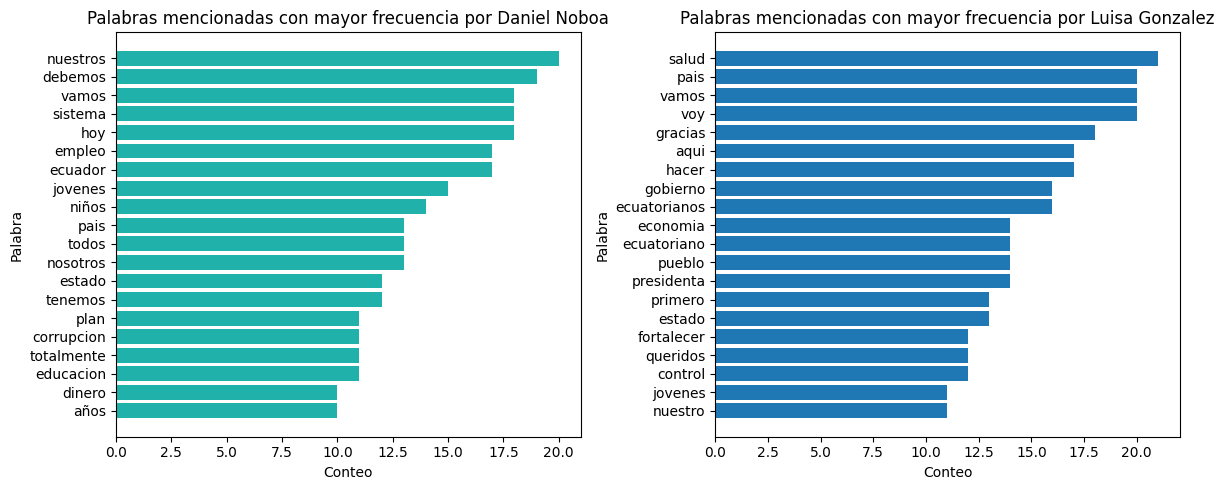

In [61]:
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for value_counts of DN
plt.subplot(1, 2, 1)
plt.barh(common_words_DN.index, common_words_DN.values, color='lightseagreen')
plt.title('Palabras mencionadas con mayor frecuencia por Daniel Noboa')
plt.xlabel('Conteo')
plt.ylabel('Palabra')

# Subplot 2 - Bar plot for value_counts of LG
plt.subplot(1, 2, 2)
plt.barh(common_words_LG.index, common_words_LG.values)
plt.title('Palabras mencionadas con mayor frecuencia por Luisa Gonzalez')
plt.xlabel('Conteo')
plt.ylabel('Palabra')

plt.tight_layout()
plt.show()

#### Análisis de frecuencia de texto : 2 palabras

In [62]:
#frequency word analysis 2 words

text_DN = ' '.join(df_DN['texto_limpio'])
words = re.findall(r'\w+', text_DN)
two_words = [' '.join(ws) for ws in zip(words, words[1:], )]
wordscount_DN = {w:f for w, f in Counter(two_words).most_common() if f > 2}
wordscount_DN = list(wordscount_DN.items())[:12][::-1]

keysDN, valuesDN = zip(*wordscount_DN)

text_LG=' '.join(df_LG['texto_limpio'])
words = re.findall(r'\w+', text_LG)
two_words = [' '.join(ws) for ws in zip(words, words[1:])]
wordscount_LG = {w:f for w, f in Counter(two_words).most_common() if f > 3}
wordscount_LG = list(wordscount_LG.items())[:12][::-1]

keysLG, valuesLG = zip(*wordscount_LG)

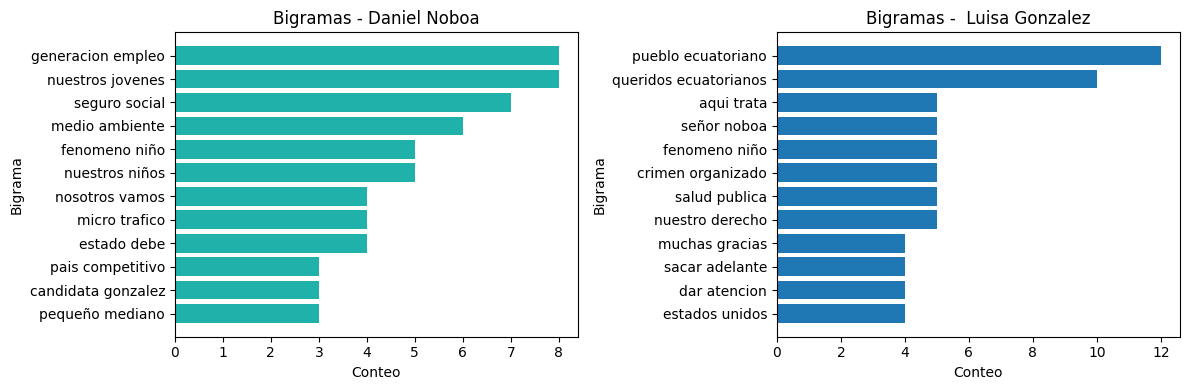

In [63]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.barh(keysDN, valuesDN, color='lightseagreen')
plt.title('Bigramas - Daniel Noboa')
plt.xlabel('Conteo')
plt.ylabel('Bigrama')

# Subplot 2 - Bar plot for value_counts of LG
plt.subplot(1, 2, 2)
plt.barh(keysLG, valuesLG)
plt.title('Bigramas -  Luisa Gonzalez')
plt.xlabel('Conteo')
plt.ylabel('Bigrama')

plt.tight_layout()
plt.show()

#### WordCloud 

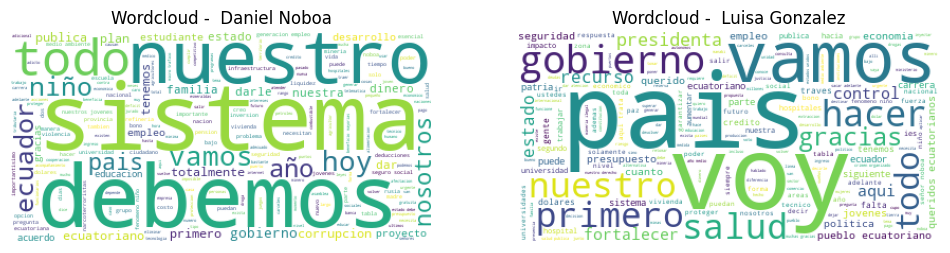

In [64]:
words_DN = pd.Series(' '.join(df_DN['texto_limpio']))
words_LG = pd.Series(' '.join(df_LG['texto_limpio']))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = "white",  max_words = 1000).generate(words_DN[0])
plt.imshow(wordcloud)
plt.title('Wordcloud -  Daniel Noboa')
plt.axis("off")

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = "white",  max_words = 1000).generate(words_LG[0])
plt.imshow(wordcloud)
plt.title('Wordcloud -  Luisa Gonzalez')
plt.axis("off")
plt.show();

#### Análisis de frecuencia de palabras según ejes temáticos

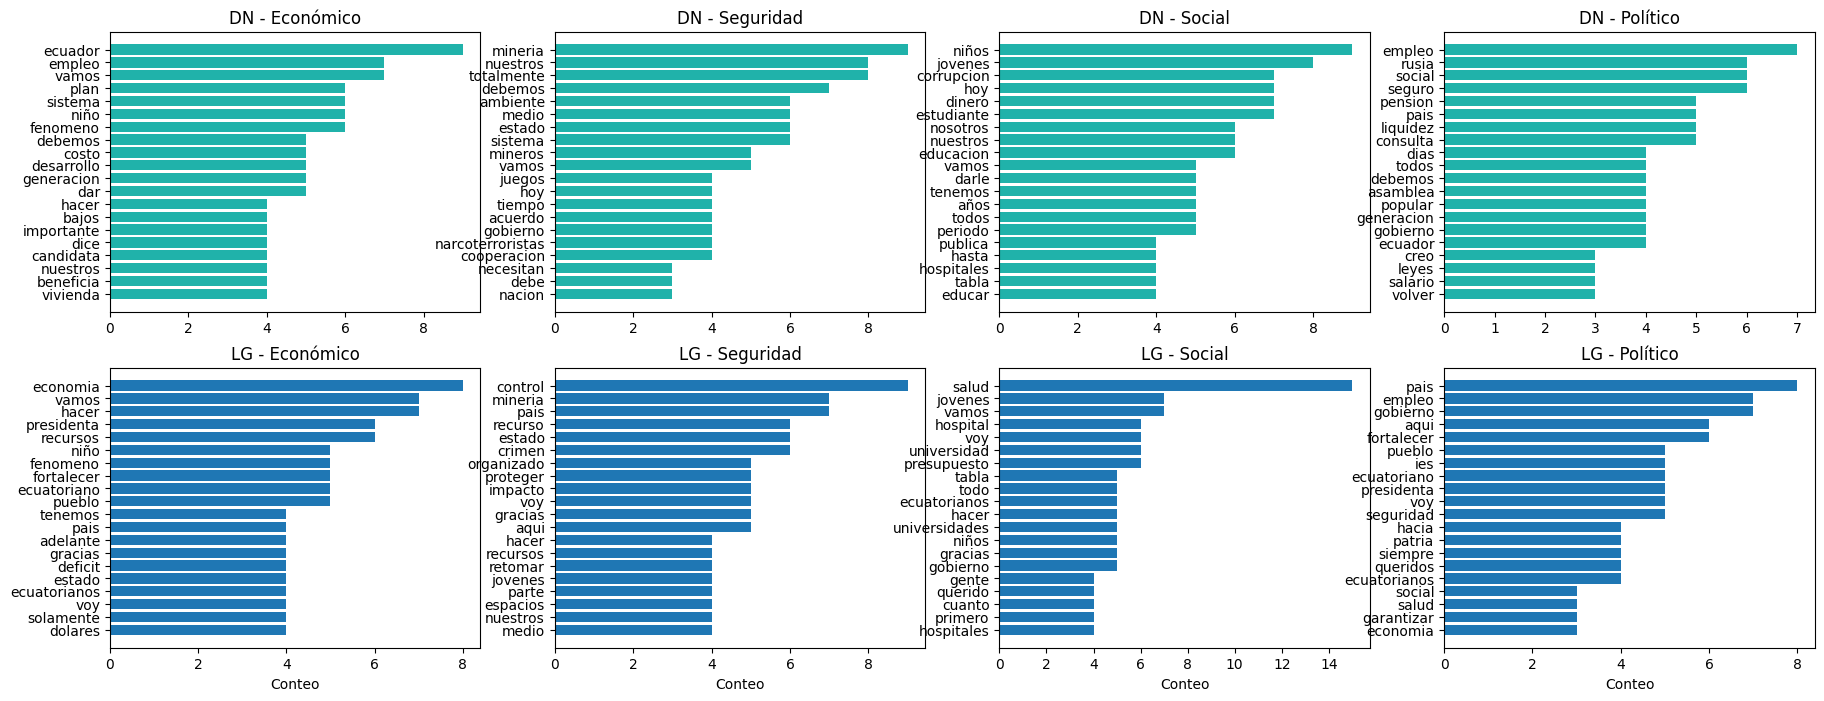

In [97]:
plt.figure(figsize=(22, 8))

for i, eje in enumerate(ejes_tematicos):
    df_DN = df[(df['participante'] == candidatos[0]) & (df['eje_tematico'] == eje)]
    common_words_DN = pd.Series(' '.join(df_DN['texto_limpio']).split()).value_counts()[0:20][::-1]
    plt.subplot(2, 4, i+1)
    plt.barh(common_words_DN.index, common_words_DN.values, color='lightseagreen')
    string ='DN - '+ str(eje)
    plt.title(string)
    
    df_LG = df[(df['participante'] == candidatos[1]) & (df['eje_tematico'] == eje)]
    common_words_LG = pd.Series(' '.join(df_LG['texto_limpio']).split()).value_counts()[0:20][::-1]
    plt.subplot(2, 4, (i+5))
    plt.barh(common_words_LG.index, common_words_LG.values)
    string ='LG - '+ str(eje)
    plt.title(string)
    plt.xlabel('Conteo')

#### Análisis de frecuencia de bigramas según ejes temáticos

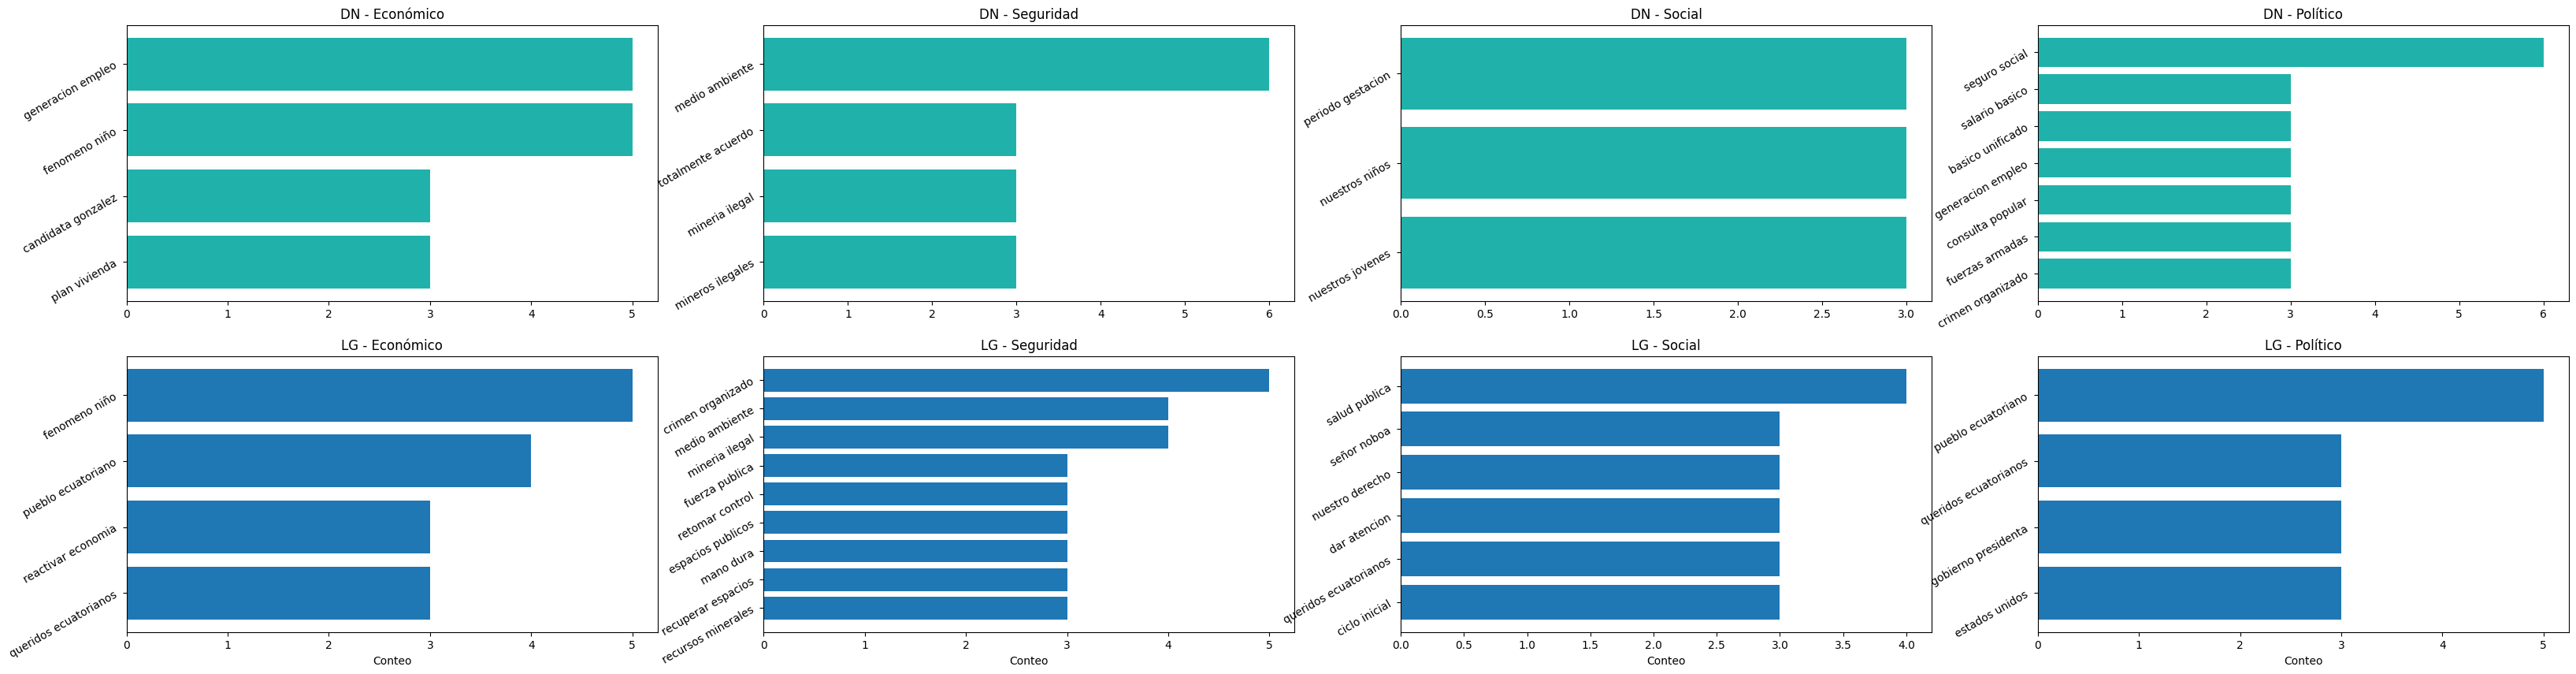

In [93]:
plt.figure(figsize=(40, 10))

for i, eje in enumerate(ejes_tematicos):

    df_DN = df[(df['participante'] == candidatos[0]) & (df['eje_tematico'] == eje)]
    text_DN = ' '.join(df_DN['texto_limpio'])
    words = re.findall(r'\w+', text_DN)
    two_words = [' '.join(ws) for ws in zip(words, words[1:], )]
    wordscount_DN = {w:f for w, f in Counter(two_words).most_common() if f > 2}
    wordscount_DN = list(wordscount_DN.items())[:12][::-1]
    keysDN, valuesDN = zip(*wordscount_DN)
    plt.subplot(2, 4, i+1)
    plt.barh(keysDN, valuesDN, color='lightseagreen')
    string ='DN - '+ str(eje)
    plt.title(string)
    plt.yticks(rotation=30)
    
    df_LG = df[(df['participante'] == candidatos[1]) & (df['eje_tematico'] == eje)]
    text_LG = ' '.join(df_LG['texto_limpio'])
    words = re.findall(r'\w+', text_LG)
    two_words = [' '.join(ws) for ws in zip(words, words[1:], )]
    wordscount_LG = {w:f for w, f in Counter(two_words).most_common() if f > 2}
    wordscount_LG = list(wordscount_LG.items())[:12][::-1]
    keysLG, valuesLG = zip(*wordscount_LG)
    plt.subplot(2, 4, i+5)
    plt.barh(keysLG, valuesLG)
    string ='LG - '+ str(eje)
    plt.title(string)
    plt.xlabel('Conteo')
    plt.yticks(rotation=30)

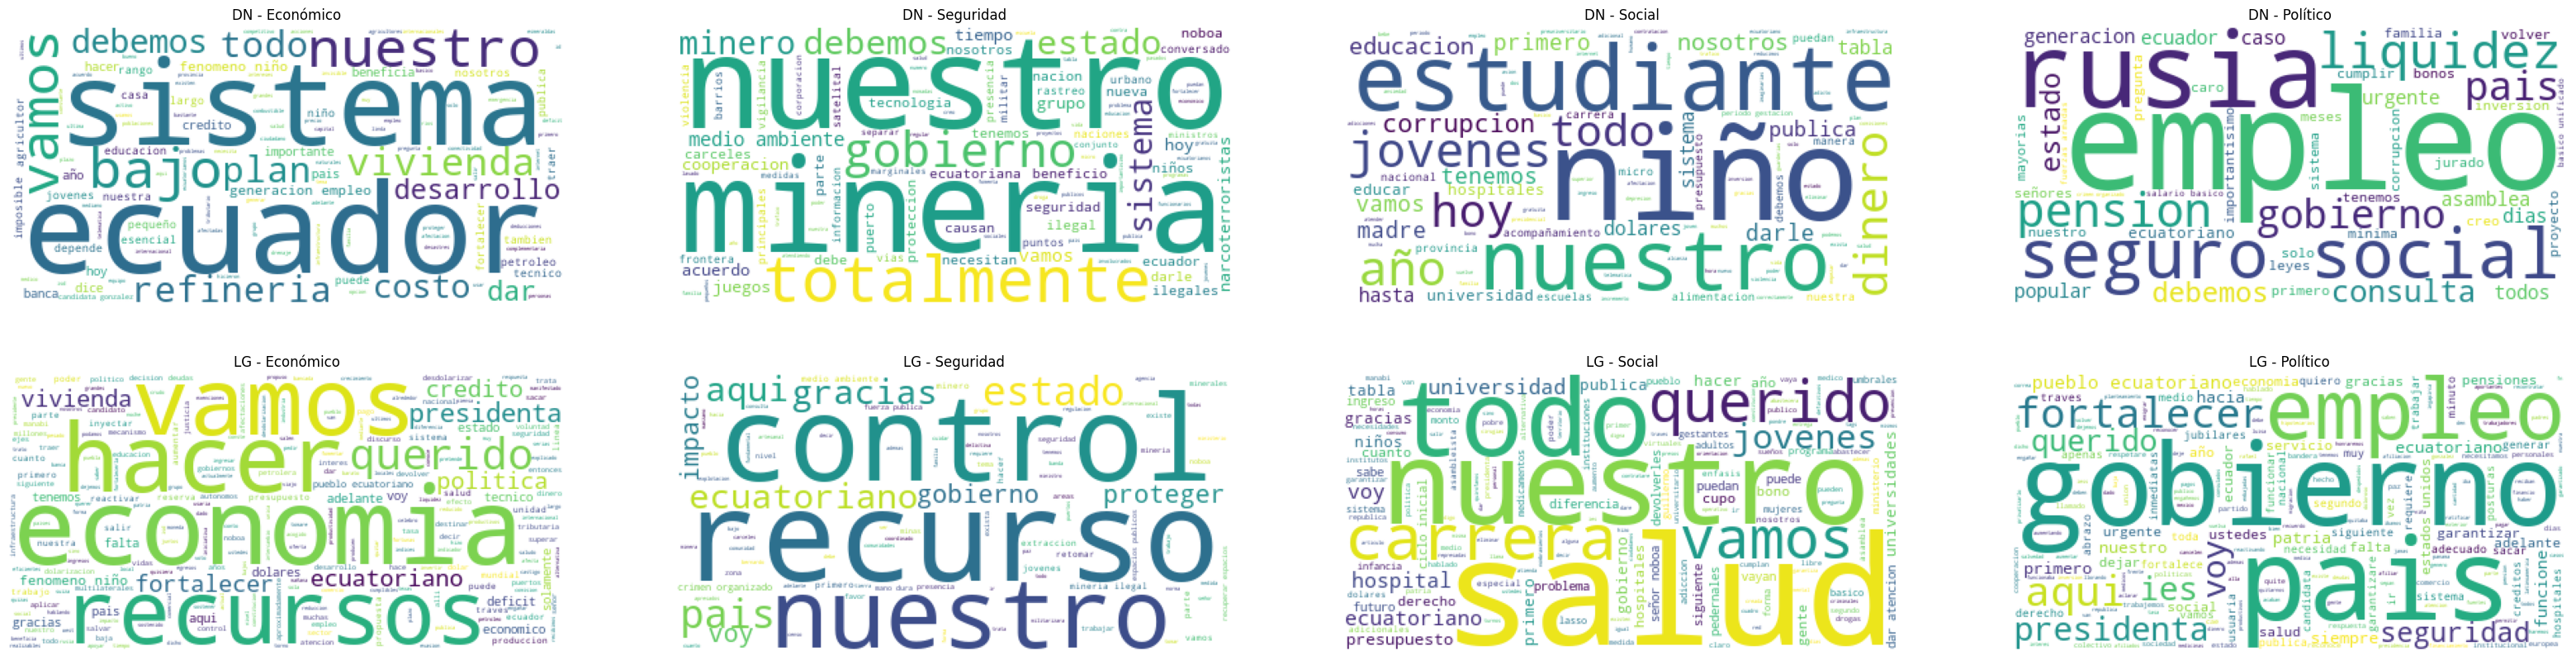

In [99]:
plt.figure(figsize=(40, 10))

for i, eje in enumerate(ejes_tematicos):

    df_DN = df[(df['participante'] == candidatos[0]) & (df['eje_tematico'] == eje)]
    words_DN = pd.Series(' '.join(df_DN['texto_limpio']))
    plt.subplot(2, 4, i+1)
    wordcloud = WordCloud(background_color = "white",  max_words = 1000).generate(words_DN[0])
    plt.imshow(wordcloud)
    string ='DN - '+ str(eje)
    plt.title(string)
    plt.axis("off")
    
    df_LG = df[(df['participante'] == candidatos[1]) & (df['eje_tematico'] == eje)]
    words_LG = pd.Series(' '.join(df_LG['texto_limpio']))
    plt.subplot(2, 4, i+5)
    wordcloud = WordCloud(background_color = "white",  max_words = 1000).generate(words_LG[0])
    plt.imshow(wordcloud)
    string ='LG - '+ str(eje)
    plt.title(string)
    plt.axis("off")